=== Original Categorized Data ===
   Completion_Time       Category
0               22   Fast Learner
1               27        On Time
2               35  Needs Support
3               24   Fast Learner
4               33  Needs Support
5               29        On Time
6               31  Needs Support
7               26        On Time
8               28        On Time
9               23   Fast Learner 

=== Data Length, Type & Structure ===
Length: 10
Completion_Time       int64
Category           category
dtype: object 

=== Frequency of Each Learner Type ===
Category
Fast Learner     3
On Time          4
Needs Support    3
Name: count, dtype: int64 

=== Proportion (%) of Each Learner Type ===
Category
Fast Learner     30.0
On Time          40.0
Needs Support    30.0
Name: proportion, dtype: float64 

=== Descriptive Statistics ===
Mean Completion Time: 27.8
Median Completion Time: 27.5
Standard Deviation: 4.06939798987516
Pass Rate: 70.00%

Enter a new threshold for dynamic compl

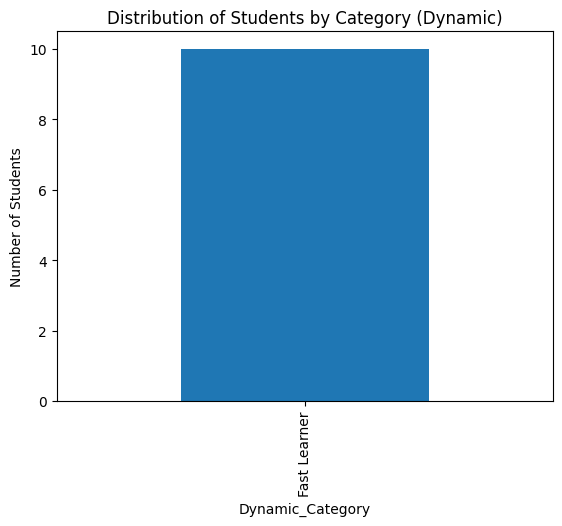

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# ------------------------------------------------------
# 1. DATA CREATION & CATEGORIZATION
# ------------------------------------------------------

# Example completion times in hours for 10 students
completion_times = [22, 27, 35, 24, 33, 29, 31, 26, 28, 23]

# Function to classify based on default thresholds
def classify_learner(hours, expected=30):
    if hours < 25:
        return "Fast Learner"
    elif 25 <= hours <= expected:
        return "On Time"
    else:
        return "Needs Support"

# Apply classification
categories = [classify_learner(t) for t in completion_times]

# Factor (categorical) variable with order
cat_type = pd.CategoricalDtype(
    categories=["Fast Learner", "On Time", "Needs Support"], ordered=True
)

df = pd.DataFrame({
    "Completion_Time": completion_times,
    "Category": pd.Series(categories, dtype=cat_type)
})

print("=== Original Categorized Data ===")
print(df, "\n")


# ------------------------------------------------------
# 2. DATA OPERATIONS
# ------------------------------------------------------

print("=== Data Length, Type & Structure ===")
print(f"Length: {len(completion_times)}")
print(df.dtypes, "\n")

# Frequency count
freq = df["Category"].value_counts().sort_index()
print("=== Frequency of Each Learner Type ===")
print(freq, "\n")

# Proportion
proportion = df["Category"].value_counts(normalize=True).sort_index() * 100
print("=== Proportion (%) of Each Learner Type ===")
print(proportion, "\n")


# ------------------------------------------------------
# 3. DESCRIPTIVE STATISTICS
# ------------------------------------------------------

mean_val = np.mean(completion_times)
median_val = np.median(completion_times)
std_val = np.std(completion_times)

print("=== Descriptive Statistics ===")
print(f"Mean Completion Time: {mean_val}")
print(f"Median Completion Time: {median_val}")
print(f"Standard Deviation: {std_val}")

# Pass rate: Fast Learner + On Time
pass_count = df[df["Category"] != "Needs Support"].shape[0]
pass_rate = (pass_count / len(df)) * 100
print(f"Pass Rate: {pass_rate:.2f}%\n")


# ------------------------------------------------------
# 4. ADVANCED REQUIREMENT (LEVEL 5)
# ------------------------------------------------------

print("Enter a new threshold for dynamic completion classification.")
new_threshold = int(input("Enter expected completion time (e.g., 30): "))

def classify_dynamic(hours, threshold):
    if hours < (threshold - 5):  # Fast learner = 5 hours faster than threshold
        return "Fast Learner"
    elif (threshold - 5) <= hours <= threshold:
        return "On Time"
    else:
        return "Needs Support"

df["Dynamic_Category"] = [classify_dynamic(t, new_threshold) for t in completion_times]

print("\n=== Updated Classification with Dynamic Threshold ===")
print(df, "\n")

# ------------------------------------------------------
# BAR CHART VISUALIZATION
# ------------------------------------------------------

plt.title("Distribution of Students by Category (Dynamic)")
plt.xlabel("Category")
plt.ylabel("Number of Students")
df["Dynamic_Category"].value_counts().sort_index().plot(kind="bar")
plt.show()
